# COVID-RS

O objetivo desta tarefa é utilizar e avaliar técnicas de aprendizado de máquina em uma base de dados real. Esta base é originada da Secretaria Estadual de Saúde do RS e contém todos casos registrados de COVID-19 no estado, com informações diversas sobre cada caso, incluindo informações de hospitalização e óbito. 

Este notebook contém o esqueleto básico para carregar os dados e deve ser expandido para explorar metodologias diversas.

# Carregamento dos dados

In [1]:
# Vamos usar o pandas para carregar os dados. Observar que o separador de colunas no arquivo é ponto-e-vírgula.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 70) # pelo menos 70 coluna serão impressas no dataframe

In [2]:
dados = pd.read_csv("../Datasets/dados_covid_rs.csv", delimiter=';')
dados.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,11/09/2020,08/09/2020,NaN,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,Gestante,SIM,NaN,22/09/2020,NAO INFORMADO,NAO ENCONTRADO,NAO INFORMADO,NaN,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,19/10/2020,05/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,19/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,06/10/2020,06/10/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,20/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,05/10/2020,29/09/2020,NaN,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,13/10/2020,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,30/07/2020,26/07/2020,NaN,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,Portador de doenças cromossômicas ou estado de...,NAO,NaN,09/08/2020,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


In [3]:
# Qual o tamanho da tabela (linhas, colunas)?
dados.shape

(254828, 29)

# Pré-processamento

Os dados raramente vem limpos e prontos para uso. No mínimo, precisamos converter ou adequar tipos e lidar com valores faltantes. Também podemos querer expandir os dados, incluindo novas colunas derivadas dos próprios dados ou de fontes externas.

## Datas

Por exemplo, temos várias colunas que são datas, mas estão representadas como strings. É uma boa ideia converter estas strings para datas reais

In [4]:
dados["DATA_CONFIRMACAO"] = pd.to_datetime(dados["DATA_CONFIRMACAO"], format="%d/%m/%Y")
dados["DATA_SINTOMAS"] = pd.to_datetime(dados["DATA_SINTOMAS"], format="%d/%m/%Y")
dados["DATA_EVOLUCAO"] = pd.to_datetime(dados["DATA_EVOLUCAO"], format="%d/%m/%Y")
dados["DATA_INCLUSAO_OBITO"] = pd.to_datetime(dados["DATA_INCLUSAO_OBITO"], format="%d/%m/%Y")
dados["DATA_EVOLUCAO_ESTIMADA"] = pd.to_datetime(dados["DATA_EVOLUCAO_ESTIMADA"], format="%d/%m/%Y")

dados.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,CONDICOES,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,2020-09-11,2020-09-08,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,Gestante,SIM,NaT,2020-09-22,NAO INFORMADO,NAO ENCONTRADO,NAO INFORMADO,NaN,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2020-10-19,2020-10-05,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-19,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,2020-10-06,2020-10-06,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-20,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,2020-10-05,2020-09-29,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaT,2020-10-13,BRANCA,NAO ENCONTRADO,NAO,ZONA RURAL,NAO,E-SUS,BRASIL,NAO
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,2020-07-30,2020-07-26,NaT,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,Portador de doenças cromossômicas ou estado de...,NAO,NaT,2020-08-09,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO


## Valores Faltantes

Algumas colunas possuem vários "NaN" (Not a Number) ou "NaT" (Not a Time), indicando que são valores faltantes.

Há diversas maneiras de lidar com buracos nos dados, vamos primeiro quantificar o problema contando o número de buracos por coluna.


In [5]:
def quantifica_nans():
  rows = []
  for column in dados.columns:
    row = {'coluna': column, 'nans': dados[column].isnull().sum(), 'frac_nans': dados[column].isnull().sum() / dados.shape[0]}
    rows.append(row)
  res = pd.DataFrame(rows)
  res = res[res.nans>0].sort_values('nans', ascending=False)
  
  return res

In [6]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248874,0.976635
9,DATA_EVOLUCAO,235978,0.926029
17,CONDICOES,214755,0.842745
20,DATA_EVOLUCAO_ESTIMADA,28088,0.110223
27,PAIS_NASCIMENTO,11946,0.046879
22,ETNIA_INDIGENA,11592,0.045490
24,BAIRRO,4966,0.019488
15,DISPNEIA,3033,0.011902
12,FEBRE,20,0.000078
13,TOSSE,20,0.000078


Existe 20 valores `nans` para `FEBRE, TOSSE, GARGANTA` e `OUTROS`. Será verificado se estes valores pertencem as mesmas linhas.

In [7]:
# Percorre nessas colunas, adicionando seus indices em uma lista
# Depois, fica apenas com os valores únicos e imprime a quantidade

indexes = []
for column in ['FEBRE', 'TOSSE', 'GARGANTA', 'OUTROS']:
  indexes += list(dados[dados['FEBRE'].isna()].index)
  
indexes = set(indexes)
len(indexes)

20

Pelo resultado da célula anterior, foi verificado que as 20 linhas são as mesmas. Então, iremos dropar essas linhas do conjunto de dados.

In [8]:
# Remove os valores nans das colunas inseridas
dados = dados.dropna(subset=['FEBRE', 'TOSSE', 'GARGANTA', 'OUTROS'])

Vamos verificar o comportamento do `nans` novamente

In [9]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
17,CONDICOES,214738,0.842744
20,DATA_EVOLUCAO_ESTIMADA,28085,0.110220
27,PAIS_NASCIMENTO,11932,0.046827
22,ETNIA_INDIGENA,11578,0.045438
24,BAIRRO,4949,0.019422
15,DISPNEIA,3013,0.011825


Como pode ser visto, `FONTE_INFORMAÇÃO` acabou saindo do conjunto de `nans`, pois estava incluido no nas 20 linhas retiradas.

as colunas `PAIS_NASCIMENTO, ETNIA_INDIGENA, BAIRRO` e `DISPNEIA` possuem poucos valores `nans` avaliando sua fração, mas caso fosse retirado todas essas linhas, seria perdido uma quantidade consideravel de informação.

Como possível solução, será adicionado um valor novo aos valores `nans`, indicando que seu valor é `NÃO INFORMADO`.

Mas antes disso, é interessante verificar se esse valor `NÃO INFORMADO` (ou algo próximo) já existe nessas colunas. Em caso positivo, pode deixar os valores `nans` com este valor próximo.

#### PAIS_NASCIMENTO

In [10]:
# Com o value_counts, podemos avaliar os valor encontrados na coluna e suas quantidades

dados['PAIS_NASCIMENTO'].value_counts().head() # pode retirar o head para ver todos os valores

BRASIL                232474
NAO ENCONTRADO          8700
REPUBLICA DO HAITI      1047
VENEZUELA                194
SENEGAL                   85
Name: PAIS_NASCIMENTO, dtype: int64

Existe o valor `NAO ENCONTRADO` nessa coluna e poderiamos utiliza-lo para completar os `nans`.

Mas devido a grande quantidade de países, foi decidido dropar esta coluna

In [11]:
dados = dados.drop(columns=['PAIS_NASCIMENTO'])

#### ETNIA_INDIGENA

In [12]:
dados['ETNIA_INDIGENA'].value_counts()

NAO ENCONTRADO                                                     242344
KAINGANG (CAINGANGUE)                                                 766
NÃO INFORMADO                                                          57
GUARANI M BYA                                                          22
GUARANI                                                                10
AIKANA (AIKANA, MAS SAKA,TUBARAO)                                       6
GUARANI KAIOWA (PAI TAVYTERA)                                           4
AJURU                                                                   4
ACONA (WAKONAS, NACONAS, JAKONA, ACORANES)                              3
AKUNSU (AKUNT SU)                                                       2
GUARANI NANDEVA (AVAKATUETE, CHIRIPA, NHANDEWA, AVA GUARANI)            2
ACONA (WAKONAS, NACONAS, JAKONA, ACORAÂ-NES)                            2
JIRIPANCO (JERIPANCO, GERIPANCO)                                        1
JURUNA                                

De acordo com informações do Censo de 2010 para o Estado do Rio Grande do Sul, apenas 0.3% da população do Estado se considera "indígena" [1].

 Se avaliarmos os dados, é verificado que os valores diferentes de `NAO ENCONTRADO` acabam tendo uma quantidade muito pequena em comparação a este valor. Com isso, é possivel inferir que o valor `NAO ENCONTRADO` pode ser utilizado para representar pessoas não indígenas.

Mas devido a pouca quantidade desses valores diferentes, foi decidido dropar esta coluna.

In [13]:
dados = dados.drop(columns=['ETNIA_INDIGENA'])

#### BAIRRO

In [14]:
# BAIRRO possui 11631 valores possíveis, o que dificulta sua visualização.
# Iremos visualizar todas entradas que comecem com 'NAO'

sorted([b for b in dados['BAIRRO'].value_counts().index if b[:3] == 'NAO'])

['NAO CONSTA',
 'NAO DEIXOU',
 'NAO INF',
 'NAO INF.',
 'NAO INFORMADO',
 'NAO INFORMOU']

É possível visualizar que não existe um padrão de escrita para dados não informados. Então, foi decidido não trabalhar com essa coluna.

In [15]:
dados = dados.drop(columns=['BAIRRO'])

#### DISPNEIA

In [16]:
dados['DISPNEIA'].value_counts()

NAO    209578
SIM     42217
Name: DISPNEIA, dtype: int64

`DISPNEIA` não possui nenhum valor parecido com `NAO ENCONTRADO`. Então, será criado este valor para os `nans`

In [17]:
dados['DISPNEIA'] = dados['DISPNEIA'].fillna("NAO ENCONTRADO")

Faremos novamente as quantificacoes dos `nans`

In [18]:
quantifica_nans()

,coluna,nans,frac_nans
19,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
17,CONDICOES,214738,0.842744
20,DATA_EVOLUCAO_ESTIMADA,28085,0.110220


Ainda temos 4 colunas com valores nulos. 3 delas são valores de DATA, e pode indicar que não houve uma ocorrência deste atributo. (Ainda precisaria ser validado)

Com isso, ainda existe a coluna `CONDICOES` para ser analisada

#### CONDICOES

In [19]:
dados['CONDICOES'].value_counts()

Doenças cardíacas crônicas                                                                                                               8919
Doenças respiratórias crônicas descompensadas                                                                                            4109
Diabetes                                                                                                                                 3160
Outros                                                                                                                                   2156
Doença Cardiovascular Crônica                                                                                                            2051
                                                                                                                                         ... 
Doença Cardiovascular Crônica, Doença Hepática Crônica, Diabetes mellitus, Outra Pneumatopatia Crônica, Doença Renal Crônica                1
Puérpe

Existe 698 valores encontrados em `CONDICOES`, mas pode ser verificado que existe multiplos valores em uma coluna, sendo dividos por vírgula.

É possivel avaliar os valores de forma única, dividindo pela virgula e verificando a quantidade de `CONDICOES` únicas encontradas.

In [20]:
# É importado o defaultdict da biblioteca collections.
# O defaultdic funciona igual o dicionário, mas adiciona um valor fixo caso a chave não exista ao ser consultada
# Neste caso, o valor fixo é 0 (zero)
from collections import defaultdict
condicoes_dict = defaultdict(int)

# É importado o regex, para trabalhar com as strings
import re

# Adiciona a string 'nan' nos valores nulos
# Percorre todos os valores
for value in dados['CONDICOES'].fillna('nan').values:
  
  # Divide palavras por ',' que não estejam dentro dos parenteses
  for s in re.split(r',\s*(?![^()]*\))', value):
    condicoes_dict[s.strip()] += 1

len(condicoes_dict.keys())

34

Foi encontrado 34 valores diferentes na coluna CONDICOES após a filtragem por vírgulas. Vamos verificar todas elas em ordem alfabética.

In [21]:
sorted(list(condicoes_dict.items()), key=lambda x: x[0])

[('Asm', 3),
 ('Asma', 1112),
 ('Diabetes', 6449),
 ('Diabetes mellitu', 18),
 ('Diabetes mellitus', 5793),
 ('Doença Cardiovascular Crônica', 8106),
 ('Doença Hematológica Crônic', 41),
 ('Doença Hematológica Crônica', 212),
 ('Doença Hepática Crônic', 3),
 ('Doença Hepática Crônica', 378),
 ('Doença Neurológica Crônic', 10),
 ('Doença Neurológica Crônica', 1613),
 ('Doença Renal Crônic', 13),
 ('Doença Renal Crônica', 1177),
 ('Doenças cardíacas crônicas', 12854),
 ('Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)', 623),
 ('Doenças respiratórias crônicas descompensadas', 5239),
 ('Gestante', 928),
 ('Gestante de alto risco', 33),
 ('Imunodeficiênci', 21),
 ('Imunodeficiência', 1067),
 ('Imunossupressão', 1335),
 ('Obesidad', 14),
 ('Obesidade', 3120),
 ('Outra Pneumatopatia Crônic', 6),
 ('Outra Pneumatopatia Crônica', 1643),
 ('Outro', 124),
 ('Outros', 7615),
 ('Pneumatopatia Crônica', 97),
 ('Portador de doenças cromossômicas ou estado de fragilidade imunológica',
 

Existe muitos valores que representam a mesma coisa mas possuem uma letra faltando no fim. Para isso, será criado um dicionário para poder ser feito a conversão corretamente.

In [22]:
# É criado uma lista indicando qual será a conversão
conversao_condicoes = {}
condicoes = sorted(list(condicoes_dict.keys()))

# é passado por caso palavra, verificando se a próxima palavra
# menos o ultimo caracter é igual a palavra atual (confuso)
for i in range(len(condicoes) - 1):
  if condicoes[i] != condicoes[i+1][:-1]:
    conversao_condicoes[condicoes[i]] = condicoes[i]
  else:
    conversao_condicoes[condicoes[i]] = condicoes[i+1]

# adiciona o nan
conversao_condicoes['nan'] = 'nan'

conversao_condicoes

{'Asm': 'Asma',
 'Asma': 'Asma',
 'Diabetes': 'Diabetes',
 'Diabetes mellitu': 'Diabetes mellitus',
 'Diabetes mellitus': 'Diabetes mellitus',
 'Doença Cardiovascular Crônica': 'Doença Cardiovascular Crônica',
 'Doença Hematológica Crônic': 'Doença Hematológica Crônica',
 'Doença Hematológica Crônica': 'Doença Hematológica Crônica',
 'Doença Hepática Crônic': 'Doença Hepática Crônica',
 'Doença Hepática Crônica': 'Doença Hepática Crônica',
 'Doença Neurológica Crônic': 'Doença Neurológica Crônica',
 'Doença Neurológica Crônica': 'Doença Neurológica Crônica',
 'Doença Renal Crônic': 'Doença Renal Crônica',
 'Doença Renal Crônica': 'Doença Renal Crônica',
 'Doenças cardíacas crônicas': 'Doenças cardíacas crônicas',
 'Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)': 'Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)',
 'Doenças respiratórias crônicas descompensadas': 'Doenças respiratórias crônicas descompensadas',
 'Gestante': 'Gestante',
 'Gestante de alto ris

Agora, podemos verificar quantos valores possiveis existem pegando os resultados das conversões

In [23]:
condicoes_possiveis = list(set(conversao_condicoes.values()))
len(condicoes_possiveis)

24

Então, uma possível solução para essa coluna é fazer uma codificação One Hot, onde cada coluna poderia indicar a presença dessas `CONDICOES`

In [24]:
# A classe LabelBinarizer do ScikitLearn será usada nessa tarefa
from sklearn.preprocessing import LabelBinarizer

# Primeiramente, resetamos os indices do dataframe
# pois retiramos algumas linhas dele
dados.index = pd.RangeIndex(len(dados.index))

# é criado um codificador com os valores de conversao_condicoes
cod = LabelBinarizer()
cod.fit(condicoes_possiveis)

# Adiciona a string 'nan' nos valores nulos
# Percorre todos os valores
one_hot_values = []
for i, value in enumerate(dados['CONDICOES'].fillna('nan').values):
  
  # Imprime o processo a cada mil iterações
  if i % 1000 == 0:
    print("\r[{}/{}]".format(i+1, dados.shape[0]), end='')
  
  # Inicializa o vetor com tudo zero
  one_hot_value = np.zeros((1,24))
  
  # Divide palavras por ',' que não estejam dentro dos parenteses
  for s in re.split(r',\s*(?![^()]*\))', value):
    
    # Cria o one-hot do valor e adiciona ao array np
    valor = conversao_condicoes[s.strip()]
    one_hot_value += cod.transform([valor])
  
  # Adiciona a lista de one_hot
  one_hot_values.append(one_hot_value)
    

# Transforma em DataFrame a informação e renomeia as colunas
one_hot_values = np.concatenate(one_hot_values)
onehot = pd.DataFrame(one_hot_values)
onehot.columns = ['CONDICAO=' + column for column in cod.classes_]

# Juntamos de volta com os dados originais e removemos a coluna CONDICOES
dados = pd.concat([dados, onehot], axis=1).drop(['CONDICOES'], axis=1)

[254001/254808]

In [25]:
dados

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,EVOLUCAO,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,OUTROS,GESTANTE,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,PROFISSIONAL_SAUDE,HOSPITALIZACAO_SRAG,FONTE_INFORMACAO,PES_PRIV_LIBERDADE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Outros,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,CONDICAO=nan
0,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,RT-PCR,2020-09-11,2020-09-08,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NaT,2020-09-22,NAO INFORMADO,NAO INFORMADO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,50 a 59,TESTE RÁPIDO,2020-10-19,2020-10-05,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-19,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,15 a 19,RT-PCR,2020-10-06,2020-10-06,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-20,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,RT-PCR,2020-10-05,2020-09-29,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaT,2020-10-13,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,430005,ÁGUA SANTA,14,PASSO FUNDO - R17 R18 R19,Feminino,30 a 39,TESTE RÁPIDO,2020-07-30,2020-07-26,NaT,RECUPERADO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,NaT,2020-08-09,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Feminino,80 e mais,TESTE RÁPIDO,2020-08-16,2020-08-16,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NaT,2020-08-30,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254804,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,20 a 29,TESTE RÁPIDO,2020-08-20,2020-08-20,NaT,RECUPERADO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NaT,2020-09-03,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254805,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,2020-08-07,2020-08-02,NaT,RECUPERADO,NAO,SIM,NAO,NAO,NAO,SIM,NAO,NaT,2020-08-16,PRETA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254806,432380,XANGRI-LÁ,3,CAPAO DA CANOA - R04 R05,Masculino,50 a 59,RT-PCR,2020-08-10,2020-08-02,NaT,RECUPERADO,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NaT,2020-08-16,BRANCA,NAO,NAO,E-SUS,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Com isso, ficamos apenas com valores nulos nas colunas de DATA

In [26]:
quantifica_nans()

,coluna,nans,frac_nans
18,DATA_INCLUSAO_OBITO,248857,0.976645
9,DATA_EVOLUCAO,235961,0.926035
19,DATA_EVOLUCAO_ESTIMADA,28085,0.110220


## Avaliando colunas

As colunas `OUTROS` e `GESTANTE` podem ter informações duplicadas, pois a coluna `CONDICAO` possui as condições (não diga!) `Outros` e `Gestante`.

Iremos verificar se essas informações são repetidas para poder retirar essas colunas

### OUTROS

In [27]:
dados['OUTROS'].value_counts()

SIM    163776
NAO     91032
Name: OUTROS, dtype: int64

In [28]:
dados['CONDICAO=Outros'].value_counts()

0.0    247069
1.0      7739
Name: CONDICAO=Outros, dtype: int64

Essas colunas não parecem ter a mesma quantidade. Além disso, a informação passada por essa coluna não é clara, dificultando uma possível interpretação dos modelos de aprendizado de máquina.

Sendo assim, iremos retirar essas colunas dos dados

In [29]:
dados = dados.drop(['OUTROS', 'CONDICAO=Outros'], axis=1)

### GESTANTE

In [30]:
dados['GESTANTE'].value_counts()

NAO    253847
SIM       961
Name: GESTANTE, dtype: int64

In [31]:
dados['CONDICAO=Gestante'].value_counts()

0.0    253880
1.0       928
Name: CONDICAO=Gestante, dtype: int64

As informações destas colunas parecem bem próximas. A coluna `GESTANTE` possui mais exemplos de `SIM` que `CONDICAO=Gestante`, então, iremos verificar se todos os exemplos de `CONDICAO=Gestante` estão incluídos em `GESTANTE`.

In [32]:
dados[dados.GESTANTE == 'SIM']['CONDICAO=Gestante'].value_counts()

1.0    928
0.0     33
Name: CONDICAO=Gestante, dtype: int64

Como pode ser visto, todos exemplos positivos da coluna `CONDICAO=Gestante` estão incluídos em `GESTANTE`. Os dados restantes que não batem podem ser algum erro de inclusão no sistema, então iremos utilizar apenas o dado da coluna com mais exemplos positivos.

In [33]:
dados = dados.drop('CONDICAO=Gestante', axis=1)

## Criação de Coluna

Em modelos de aprendizado de máquina, variáveis como DATAS podem ser difíceis de serem integradas aos modelos. Elas podem ser utilizadas para apresentar uma possivel sequência temporal mas no nosso caso, isso não é possível, pois temos apenas um dado sobre cada pessoa.

Apesar disso, temos diferentes colunas apresentando dados sobre tempo. Com isso, podemos criar uma nova coluna indicando alguma informação entre essas datas.

### DIAS ATÉ CONFIRMAÇÃO

Um dado possível de ser retirado, é quantos dias se passaram desde que os sintomas se iniciaram até a confirmação de covid.

In [34]:
dados['DIAS_ATE_CONFIRMACAO'] = (dados["DATA_CONFIRMACAO"] - dados["DATA_SINTOMAS"])
dados['DIAS_ATE_CONFIRMACAO'] /= np.timedelta64(1, 'D')

Com isso, as datas de confirmação e sintomas não serão utilizadas e podemos retira-las dos dados.

In [35]:
dados = dados.drop(['DATA_CONFIRMACAO', 'DATA_SINTOMAS'], axis=1)

## Exclusão de Colunas

Neste momento, podemos avaliar algumas colunas que podem ser excluidas dos dados, por não ter informação relevante para um modelo

In [36]:
# Essas colunas serão excluidas
eliminate_columns = [
  'COD_IBGE', # Não foi encontrada uma maneira de utilizar
  'MUNICIPIO', # Muitos valores possiveis
  'COD_REGIAO_COVID', # Muitos valores possiveis
  'REGIAO_COVID', # Muitos valores possiveis
  'CRITERIO', # Não vejo maneira de utilizar
  'FONTE_INFORMACAO', # Não vejo maneira de utilizar
  'PES_PRIV_LIBERDADE', # Não vejo maneira de utilizar
  'EVOLUCAO', # Pode ter vazamento de informação
  'HOSPITALIZACAO_SRAG', # Vazamento de informação
  'DATA_INCLUSAO_OBITO', # Vazamento de informação
  'DATA_EVOLUCAO', # Muitos dados nulos
  'DATA_EVOLUCAO_ESTIMADA', # Informação estimada, não será usado
  'CONDICAO=nan', # Essa informação indica que não tem condições
]

# As datas não serão utilizadas pelo modelo
# a coluna OUTRAS não parece indica nenhuma informação (pelo nome)
# a CONDICAO=Gestante foi retirada pois já existe uma coluna GESTANTE
# a CONDICAO=nan foi retirada pois é a indicação que não teve nenhuma condição
dados = dados.drop(eliminate_columns, axis=1)

## Transformando as colunas restantes

Vamos avaliar as colunas restantes

In [37]:
dados

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,DISPNEIA,GESTANTE,RACA_COR,PROFISSIONAL_SAUDE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,DIAS_ATE_CONFIRMACAO
0,Feminino,20 a 29,NAO,SIM,NAO,SIM,NAO,SIM,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,Feminino,50 a 59,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,Masculino,15 a 19,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Feminino,40 a 49,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,Feminino,30 a 39,NAO,NAO,SIM,SIM,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,Feminino,80 e mais,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254804,Masculino,20 a 29,NAO,NAO,NAO,NAO,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254805,Masculino,50 a 59,NAO,SIM,NAO,NAO,NAO,NAO,PRETA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
254806,Masculino,50 a 59,NAO,SIM,NAO,SIM,NAO,NAO,BRANCA,NAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


Podemos dividir em 3 grupos: 

    - O primeiro precisa apenar transformar SIM e NAO em 1 e 0. 
    - O segundo precisa trabalhar com codificação one-hot para organizar os seus valores.
    - O terceiro pode indicar ordem (FAIXAETARIA)

### Binarização (essa palavra existe?)

Primeiro, fazemos a transformação nas colunas desejadas

In [38]:
binary_columns = [
  'HOSPITALIZADO',
  'FEBRE',
  'TOSSE',
  'GARGANTA',
  'GESTANTE',
] 

for column in binary_columns:
  dados[column] = dados[column].replace({'NAO': 0, 'SIM': 1})

dados['SEXO'] = dados['SEXO'].replace({'Masculino': 0, 'Feminino': 1})

Em seguida, iremos adicionar `1` caso a pessoa seja um Profissional de Saúde e `0` em caso negativo (ou não informado)

In [39]:
dados["PROFISSIONAL_SAUDE"] = dados["PROFISSIONAL_SAUDE"].apply(lambda x: 1 if x == 'SIM' else 0)

### Codificação ONE-HOT

In [40]:
# Fazer o one hot dessas colunas
one_hot_columns = [
  'DISPNEIA',
  'RACA_COR',
]

for column in one_hot_columns:
  
  # Cria o codificador para essa coluna
  cod = LabelBinarizer()
  cod.fit(dados[column])
  
  # Transforma os atributos em vetor one_hot
  atributo_transformado = cod.transform(dados[column])
  
  # Cria um dataframe e modifica as coluans
  onehot = pd.DataFrame(atributo_transformado)
  onehot.columns = [column + '=' + c for c in cod.classes_]
  
  # Concatena aos dados
  dados = pd.concat([dados, onehot], axis=1).drop([column], axis=1)

### Categóricas Ordinais

A única coluna com valores categóricos é a FAIXAETARIA. Vamos analisa-la.

In [41]:
dados['FAIXAETARIA'].value_counts()

30 a 39      57708
40 a 49      47259
20 a 29      46547
50 a 59      38006
60 a 69      23414
70 a 79      11706
15 a 19       9482
80 e mais     6763
10 a 14       4715
05 a 09       4421
01 a 04       3798
<1             989
Name: FAIXAETARIA, dtype: int64

Com estes valores, podemos fazer um ordenamento, da menor faixa etária até a maior.

In [42]:
# Faixas etarias ordenadas
faixa_etaria = {
  '<1': 0,
  '01 a 04': 1,  
  '05 a 09': 2,    
  '10 a 14': 3,
  '15 a 19': 4,
  '20 a 29': 5,
  '30 a 39': 6,
  '40 a 49': 7,
  '50 a 59': 8, 
  '60 a 69': 9,
  '70 a 79': 10,      
  '80 e mais': 11,
}

# Damos replace nos valores
dados['FAIXAETARIA'] = dados['FAIXAETARIA'].replace(faixa_etaria)               

Por fim, temos os dados totalmente processados para o treinamento de um modelo.

In [43]:
dados = dados.astype(int)
dados

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,GESTANTE,PROFISSIONAL_SAUDE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,DIAS_ATE_CONFIRMACAO,DISPNEIA=NAO,DISPNEIA=NAO ENCONTRADO,DISPNEIA=SIM,RACA_COR=AMARELA,RACA_COR=BRANCA,RACA_COR=INDIGENA,RACA_COR=NAO INFORMADO,RACA_COR=PARDA,RACA_COR=PRETA
0,1,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,1,0,0
1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,0,0,0,1,0,0,0,0
2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,1,0,0,0,0
4,1,6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254803,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
254804,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
254805,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,1
254806,0,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,1,0,0,0,0


# Predição da Variável HOSPITALIZADO

Para esta tarefa, tentaremos prever a variável `HOSPITALIZADO` 

Primeiramente, devemos dividir os dados de Entrada e Saída. (Chamaremos de X e y, respectivamente)

In [44]:
X = dados.drop(columns=['HOSPITALIZADO'])
y = dados['HOSPITALIZADO']

Vamos avaliar a distribuição de y

In [45]:
y.value_counts()

0    234282
1     20526
Name: HOSPITALIZADO, dtype: int64

Os valores não estão balanceados, então verificar a acurácia do modelo não parece um bom parametro de desempenho.

Para divisão treino/teste, será dividido da maneira 80/20.

Como a distribuição não é balanceada, usaremos o argumento stratify da função train_test_split do ScikitLearn para manter uma divisão balanceada.

In [46]:
# Função train_test_split do ScikitLearn
from sklearn.model_selection import train_test_split

# Dividido entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Alguns pacotes necessários

In [47]:
from sklearn.metrics import classification_report # Classificação dos resultados do modelo
from sklearn.metrics import confusion_matrix # Matriz de Confusão
import seaborn as sns # Usado pra plotar a matriz de confusão
from sklearn.model_selection import cross_validate # Validação Cruzada
from sklearn.model_selection import GridSearchCV # Grid Search com Validação Cruzada 

Métricas utilizadas para avaliar os modelos

In [48]:
metrics = ['accuracy', 'f1', 'precision', 'recall']

## Árvores de Decisão

Iremos utilizar as Árvores de Decisão como primeiro modelo. 

Primeiramente, iremos fazer um `Grid Search` unido de Validação Cruzada para encontrar os melhores parâmetros do modelo.

Utilizando o método `GridSearchCV` do `scikit-learn`, podemos passar um conjunto de parâmetros a serem avaliados, e o método faz uma busca exaustiva, testando todos as combinações possíveis. Para isso, é necessário passar uma métrica a ser avaliada para decidir os melhores conjuntos de parâmetros.

Nesse problema, usaremos as métricas apresentadas logo a cima.

In [49]:
# Cria o classificador e treina com os dados de treino 
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão

# Parâmetros a serem buscadas
parameters = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [50, 100, None],
  'min_samples_split': [2, 4],
}

# Avalia os melhores modelos para as métricas buscadas
best_trees = {}
for i, metric in enumerate(metrics):
  
  # Usado para saber qual métrica está sendo testada
  print('\r' + ' ' * 100, end='')
  print('\r {} [{}/{}]'.format(metric, i+1, len(metrics)), end='')
  
  # Chamada do GridSearchCV para Arvore de Decisão
  decision_tree_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=0), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  decision_tree_clf.fit(X_train, y_train)
  
  # Salva o melhor modelo para essa métrica
  best_trees[metric] = decision_tree_clf

 recall [4/4]                                                                                       

Com a busca completa, podemos apresentar os melhores parâmetros para cada métrica.

In [50]:
def display_best_parameters(bests):
  
  # Cria adiciona as informações em uma lista
  data = []
  for best in bests.values():
    d = best.best_params_
    d.update({'best_score': best.best_score_})
    data.append(d)
  
  # Cria um dataframe da informação
  return pd.DataFrame(data, index=bests.keys())

In [51]:
display_best_parameters(best_trees)

,criterion,max_depth,min_samples_split,best_score
accuracy,gini,50,4,0.966372
f1,gini,50,4,0.768556
precision,gini,50,4,0.862405
recall,gini,50,4,0.693137


Neste exemplo, os melhores parâmetros de todas as métricas foram iguais.

Para verificarmos o melhor resultado do modelo, usaremos o melhor modelo da acurácia `f1` para predizer os dados de teste.

In [52]:
# Resultado do melhor modelo de decision tree
best_estimator_decision_tree = best_trees['f1'].best_estimator_
y_predict_dec_tree = best_estimator_decision_tree.predict(X_test)

Utilizando o `classification_report` do `scikit-learn`, iremos visualizar o desempenho do modelo em algumas métricas nos dados de teste.

In [53]:
print(classification_report(y_test, y_predict_dec_tree))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     46857
           1       0.87      0.69      0.77      4105

    accuracy                           0.97     50962
   macro avg       0.92      0.84      0.88     50962
weighted avg       0.97      0.97      0.97     50962



Além disso, podemos visualizar uma matriz de confusão apresentando a distribuição das predições.

In [54]:
def cria_matriz_de_confusao(y_test, y_predict):
  
  # Cria a Matriz de Confusão
  matriz_de_confusao = confusion_matrix(y_test, y_predict)
  matriz_de_confusao = matriz_de_confusao / np.sum(matriz_de_confusao, axis=1)[:, np.newaxis]
  
  # Cria o heatmap da matriz de confusão
  sns.heatmap(matriz_de_confusao, annot=True, fmt='.2%', cmap='Blues')
  plt.ylabel('Valores Reais')
  plt.xlabel('Valores Preditos')
  plt.show()

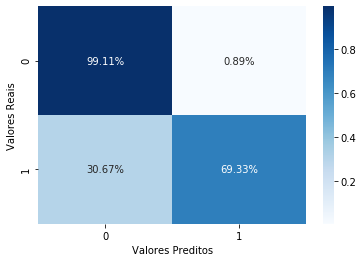

In [55]:
cria_matriz_de_confusao(y_test, y_predict_dec_tree)

## Random Forest

Para o segundo modelo testado, iremos subir de nível. Neste caso, iremos utilizar as `Random Forests`, que são a união de multiplas árvores de decisão para predizer valores.

Novamente, buscaremos os melhores parâmetros do modelo através de um `GridSearchCV`.

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Parâmetros a serem buscadas
parameters = {
  'criterion': ['gini'], # Como a árvore de decisão teve um melhor resultado usando gini
  'n_estimators': [100, 150], 
  'max_depth': [50, None], 
  'min_samples_split': [2, 4],
}

# Avalia os melhores modelos apenas para as métricas precision e recall
# pois Random Forest é mais custoso computacionalmente
best_forests = {}
for i, metric in enumerate(['precision', 'recall']):
  
  # Usado para saber qual métrica está sendo testada
  print('\r' + ' ' * 100, end='')
  print('\r {} [{}/{}]'.format(metric, i+1, 2), end='')
  
  # Chamada do GridSearchCV para Arvore de Decisão
  random_forest_clf = GridSearchCV(
    RandomForestClassifier(random_state=0), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  random_forest_clf.fit(X_train, y_train)
  
  # Salva o melhor modelo para essa métrica
  best_forests[metric] = random_forest_clf

 recall [2/2]                                                                                       

Com a busca completa, podemos apresentar os melhores parâmetros para cada métrica.

In [57]:
display_best_parameters(best_forests)

,criterion,max_depth,min_samples_split,n_estimators,best_score
precision,gini,50,4,150,0.874151
recall,gini,50,2,100,0.727422


Como os parâmetros foram diferentes, vamos aplicar o `classification_report` para os dois conjuntos de parâmetros encontrados. 

Primeiramente, para os melhor parâmetros da métrica de precisão

In [58]:
y_predict_forest_p = best_forests['precision'].best_estimator_.predict(X_test)
print(classification_report(y_test, y_predict_forest_p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     46857
           1       0.88      0.73      0.80      4105

    accuracy                           0.97     50962
   macro avg       0.93      0.86      0.89     50962
weighted avg       0.97      0.97      0.97     50962



E agora, para os melhores parâmetros da métrica de recall

In [59]:
y_predict_forest_r = best_forests['recall'].best_estimator_.predict(X_test)
print(classification_report(y_test, y_predict_forest_r))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     46857
           1       0.87      0.72      0.79      4105

    accuracy                           0.97     50962
   macro avg       0.92      0.86      0.89     50962
weighted avg       0.97      0.97      0.97     50962



O modelo da métrica de precisão teve resultados melhores, logo, visualizaremos sua matriz de confusão.

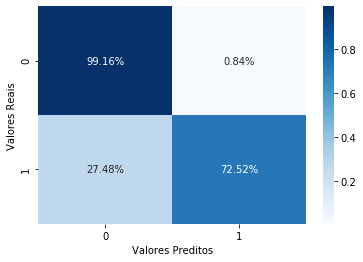

In [60]:
cria_matriz_de_confusao(y_test, y_predict_forest_p)

## MLP

Por fim, iremos avaliar um modelo de Redes Neurais. A __MLP__ _(MultiLayer Perceptron)_ é uma rede padrão de rede neural que pode ser usado na biblioteca `scikit-learn`. Nela, podemos decidir vários dos parâmetros (e hiper-parâmetros) da rede, desde a quantidade de camadas ocultas (e quantidade de neurônios), taxa de aprendizado, etc.

Utilizaremos a mesma técnica de `GridSearchCV` para decidir o melhor modelo para esse problema.

In [61]:
from sklearn.neural_network import MLPClassifier

# Parâmetros a serem buscadas
parameters = {  
  'learning_rate_init': [0.001, 0.01],
  'learning_rate': ['invscaling', 'adaptive'],
  'hidden_layer_sizes': [(100,), (50,25)],
}

# Avalia os melhores modelos apenas para as métricas precision e recall
# pois Random Forest é mais custoso computacionalmente
best_mlps = {}
for i, metric in enumerate(metrics):
  
  # Usado para saber qual métrica está sendo testada
  print('\r' + ' ' * 100, end='')
  print('\r {} [{}/{}]'.format(metric, i+1, len(metrics)), end='')
  
  # Chamada do GridSearchCV para Arvore de Decisão
  mlp_clr = GridSearchCV(
    MLPClassifier(
      random_state=0, shuffle=True, early_stopping=True,
    ), 
    parameters, 
    scoring=metric,
  )

  # Busca os melhores parâmetros para essa métrica 
  mlp_clr.fit(X_train, y_train)
  
  # Salva o melhor modelo para essa métrica
  best_mlps[metric] = mlp_clr

 recall [4/4]                                                                                       

Com os parâmetros avaliados, podemos verificar quais foram os melhores modelos para cada uma das métricas buscadas.

In [62]:
display_best_parameters(best_mlps)

,hidden_layer_sizes,learning_rate,learning_rate_init,best_score
accuracy,"(100,)",invscaling,0.001,0.971694
f1,"(50, 25)",invscaling,0.001,0.805862
precision,"(100,)",invscaling,0.010,0.908358
recall,"(50, 25)",invscaling,0.001,0.734426


Neste exemplo, tivemos um conjunto de parâmetros diferentes pra cada métrica (tirando o f1 e recall que obtiveram os mesmos parâmetros). Então, iremos verificar os seus resultados no classification_report e decidir qual possui o melhor desempenho.

In [63]:
# Percorre todos os resultados, fazendo o classification_report
for metric, estimator in best_mlps.items():
  y_predict_mlp = estimator.best_estimator_.predict(X_test)
  print('\t\t\t', metric)
  print(classification_report(y_test, y_predict_mlp))
  print('\n')

			 accuracy
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     46857
           1       0.90      0.73      0.81      4105

    accuracy                           0.97     50962
   macro avg       0.94      0.86      0.90     50962
weighted avg       0.97      0.97      0.97     50962



			 f1
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     46857
           1       0.92      0.72      0.81      4105

    accuracy                           0.97     50962
   macro avg       0.95      0.86      0.90     50962
weighted avg       0.97      0.97      0.97     50962



			 precision
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46857
           1       0.94      0.69      0.80      4105

    accuracy                           0.97     50962
   macro avg       0.96      0.84      0.89     50962
weighted avg       0.97      0.97   

Para este problema, foi notado pelos modelos anteriores que a maior dificuldade está em predizer corretamente quem necessita de hospitalização, pois o modelo acaba acertando quase sempre quem __NÃO__ precisa, deixando apenas alguns exemplos de lado. Por isso, iremos pegar o modelo que obteve o melhor recall para valor `1` para variável `HOSPITALIZADO`. (que neste caso foi o da métrica `accuracy`)

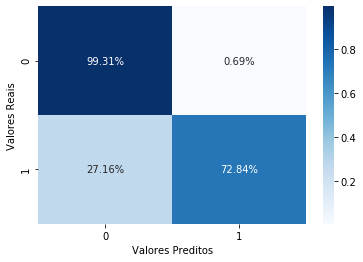

In [64]:
y_predict_mlp = best_mlps['accuracy'].best_estimator_.predict(X_test)
cria_matriz_de_confusao(y_test, y_predict_mlp)

## BÔNUS: MLP COM DADOS BALANCEADOS

As redes neurais são modelos de aprendizado de máquina muito potentes, mas que dependem de uma grande quantidade de exemplos para se ter bons resultados. (Quanto maior a rede, mais exemplos são necessários).

No nosso problema, os dados são muito "desbalanceados", pois existe mais pessoas que não foram hospitalizadas do que as que foram. Além disso, o desbalanceamento pode causar um grande problema que é fazer o modelo "tender" para um lado. Um exemplo: caso os dados estejam destribuidos como: 98% dos dados sejam SIM, enquanto 2% sejam NÃO. Neste exemplos, caso um modelo responda sempre SIM, irá obter 98% de acurácia. Esse comportamento acaba tendendo no treinamento de modelos (principalmente nos que utilizam descida de gradiente pra decidir como convergir aos dados), pois a maioria dos dados vai "puxar" pra essa possível solução.

Uma das maneiras de balancear os dados está no _Oversample,_ onde podemos aumentar os números de exemplos negativos até chegar na mesma quantidade dos exemplos positivos. (vamos duplicando exemplos aleatóriamente até chegar a mesma quantidade)

In [65]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

sampler = RandomOverSampler(random_state=0)
X_over_train, y_over_train = sampler.fit_resample(X_train, y_train)

print('Antes do Balanceamento:', Counter(y_train))
print('Depois do Balanceamento:', Counter(y_over_train))

Antes do Balanceamento: Counter({0: 187425, 1: 16421})
Depois do Balanceamento: Counter({0: 187425, 1: 187425})


In [66]:
# Cria o classificador MLP com os mesmos hiper-parâmetros
# anteriores
mlp_clr = MLPClassifier(
  random_state=0, shuffle=True, early_stopping=True,
  learning_rate_init=0.001, learning_rate='invscaling',
  hidden_layer_sizes=(100,),
)

# Treina nos dados balanceados
mlp_clr.fit(X_over_train, y_over_train)

MLPClassifier(early_stopping=True, learning_rate='invscaling', random_state=0)

In [67]:
y_predict_mlp_balanceado = mlp_clr.predict(X_test)

In [68]:
print(classification_report(y_test, y_predict_mlp_balanceado))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     46857
           1       0.57      0.90      0.70      4105

    accuracy                           0.94     50962
   macro avg       0.78      0.92      0.83     50962
weighted avg       0.96      0.94      0.94     50962



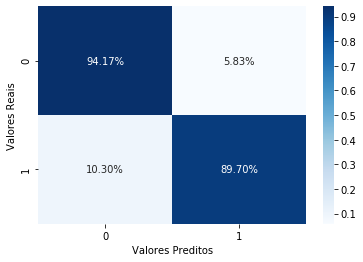

In [69]:
cria_matriz_de_confusao(y_test, y_predict_mlp_balanceado)

# Avaliando o melhor modelo com os dados atualizados

Uma boa maneira de avaliar o modelo é testar com dados que não eram possíveis de serem encontrados no momento do treinamento. Neste caso, iremos testar o melhor modelo (MLP) com dados atualizados sobre o covid, para ver como ele se comporta! 

## Pré-processamento dos dados atualizados

Antes de tudo, precisamos fazer o __mesmo__ pré-processamento feito nos dados utilizados anteriormente.

Mas primeiro, vamos recuperar os dados atualizados e filtrar para ter apenas as linhas __diferentes__ dos dados antigos.

In [70]:
# Leitura dos dados novos
dados_atualizados = pd.read_csv("../Datasets/dados_covid_rs_atualizado.csv", delimiter=';')

# Recupera a ultima data encontrada nos dados antigos
dados_antigos = pd.read_csv("../Datasets/dados_covid_rs.csv", delimiter=';', usecols=['DATA_SINTOMAS'])
dados_antigos['DATA_SINTOMAS'] = pd.to_datetime(dados_antigos['DATA_SINTOMAS'], format="%d/%m/%Y")
ultima_data = dados_antigos['DATA_SINTOMAS'].max()

# Filtra para ter apenas os dados com DATA_SINTOMAS maiores que as anteriores
dados_atualizados['DATA_SINTOMAS'] = pd.to_datetime(dados_atualizados['DATA_SINTOMAS'], format="%d/%m/%Y")
dados_atualizados = dados_atualizados[dados_atualizados['DATA_SINTOMAS'] > ultima_data]

Vamos verificar o tamanho dos dados atualizados _novos_.

In [71]:
dados_atualizados.shape

(70991, 29)

Neste momento, bate a decepção de não ter deixado as operações de pré-processamento dentro de funções. Pois seria __BEM__ mais fácil para repetir todo o processo. Mas enfim, as operações estão logo abaixo.

### Remove os nulos de FREBE, TOSSE, GARGANTA e OUTROS

In [72]:
# Remove os valores nans das colunas inseridas
dados_atualizados = dados_atualizados.dropna(subset=['FEBRE', 'TOSSE', 'GARGANTA', 'OUTROS'])

### Adiciona o valor `NAO ENCONTRADO` aos `NaNs` da coluna `DISPNEIA`

In [73]:
dados_atualizados['DISPNEIA'] = dados_atualizados['DISPNEIA'].fillna("NAO ENCONTRADO")

### Processamento da coluna `CONDICOES`

In [74]:
# Primeiramente, resetamos os indices do dataframe
# pois retiramos algumas linhas dele
dados_atualizados.index = pd.RangeIndex(len(dados_atualizados.index))


# é criado um codificador com os valores de conversao_condicoes
cod = LabelBinarizer()
cod.fit(condicoes_possiveis)

# Adiciona a string 'nan' nos valores nulos
# Percorre todos os valores
one_hot_values = []
for i, value in enumerate(dados_atualizados['CONDICOES'].fillna('nan').values):
  
  # Inicializa o vetor com tudo zero
  one_hot_value = np.zeros((1,24))
  
  # Divide palavras por ',' que não estejam dentro dos parenteses
  for s in re.split(r',\s*(?![^()]*\))', value):
    
    # Cria o one-hot do valor e adiciona ao array np
    valor = conversao_condicoes[s.strip()]
    one_hot_value += cod.transform([valor])
  
  # Adiciona a lista de one_hot
  one_hot_values.append(one_hot_value)
    

# Transforma em DataFrame a informação e renomeia as colunas
one_hot_values = np.concatenate(one_hot_values)
onehot = pd.DataFrame(one_hot_values)
onehot.columns = ['CONDICAO=' + column for column in cod.classes_]

# Juntamos de volta com os dados originais e removemos a coluna CONDICOES
dados_atualizados = pd.concat([dados_atualizados, onehot], axis=1).drop(['CONDICOES'], axis=1)

### Criação da coluna `DIAS_ATE_CONFIRMACAO`

In [75]:
# Formata as datas
dados_atualizados['DATA_CONFIRMACAO'] = pd.to_datetime(dados_atualizados['DATA_CONFIRMACAO'], format="%d/%m/%Y")
dados_atualizados['DATA_SINTOMAS'] = pd.to_datetime(dados_atualizados['DATA_SINTOMAS'], format="%d/%m/%Y")

# Cria a coluna DIAS_ATE_CONFIRMACAO
dados_atualizados['DIAS_ATE_CONFIRMACAO'] = (dados_atualizados["DATA_CONFIRMACAO"] - dados_atualizados["DATA_SINTOMAS"])
dados_atualizados['DIAS_ATE_CONFIRMACAO'] /= np.timedelta64(1, 'D')

### Binarização, One-Hot e Ordem da coluna `FAIXAETARIA`

In [76]:
### BINARIZAÇÃO ###

binary_columns = [
  'HOSPITALIZADO',
  'FEBRE',
  'TOSSE',
  'GARGANTA',
  'GESTANTE',
] 

for column in binary_columns:
  dados_atualizados[column] = dados_atualizados[column].replace({'NAO': 0, 'SIM': 1})

dados_atualizados['SEXO'] = dados_atualizados['SEXO'].replace({'Masculino': 0, 'Feminino': 1})
dados_atualizados["PROFISSIONAL_SAUDE"] = dados_atualizados["PROFISSIONAL_SAUDE"].apply(lambda x: 1 if x == 'SIM' else 0)


### CODIFICAÇÃO ONE-HOT ###

# Fazer o one hot dessas colunas
one_hot_columns = [
  'DISPNEIA',
  'RACA_COR',
]

for column in one_hot_columns:
  
  # Cria o codificador para essa coluna
  cod = LabelBinarizer()
  cod.fit(dados_atualizados[column])
  
  # Transforma os atributos em vetor one_hot
  atributo_transformado = cod.transform(dados_atualizados[column])
  
  # Cria um dataframe e modifica as coluans
  onehot = pd.DataFrame(atributo_transformado)
  onehot.columns = [column + '=' + c for c in cod.classes_]
  
  # Concatena aos dados
  dados_atualizados = pd.concat([dados_atualizados, onehot], axis=1).drop([column], axis=1)

### Ordem na coluna de FAIXAETARIA ###  
  
# Damos replace nos valores
dados_atualizados['FAIXAETARIA'] = dados_atualizados['FAIXAETARIA'].replace(faixa_etaria)

Por fim, filtramos os novos dados para ter as mesmas colunas do dataset anterior e na mesma ordem

In [77]:
# Filtrando as colunas
dados_atualizados = dados_atualizados[dados.columns]

# Transformando as informações em inteiro
dados_atualizados = dados_atualizados.astype(int)
dados_atualizados

,SEXO,FAIXAETARIA,HOSPITALIZADO,FEBRE,TOSSE,GARGANTA,GESTANTE,PROFISSIONAL_SAUDE,CONDICAO=Asma,CONDICAO=Diabetes,CONDICAO=Diabetes mellitus,CONDICAO=Doença Cardiovascular Crônica,CONDICAO=Doença Hematológica Crônica,CONDICAO=Doença Hepática Crônica,CONDICAO=Doença Neurológica Crônica,CONDICAO=Doença Renal Crônica,CONDICAO=Doenças cardíacas crônicas,"CONDICAO=Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)",CONDICAO=Doenças respiratórias crônicas descompensadas,CONDICAO=Gestante de alto risco,CONDICAO=Imunodeficiência,CONDICAO=Imunossupressão,CONDICAO=Obesidade,CONDICAO=Outra Pneumatopatia Crônica,CONDICAO=Pneumatopatia Crônica,CONDICAO=Portador de doenças cromossômicas ou estado de fragilidade imunológica,CONDICAO=Puérpera,CONDICAO=Puérpera (até 45 dias do parto),CONDICAO=Síndrome de Down,DIAS_ATE_CONFIRMACAO,DISPNEIA=NAO,DISPNEIA=NAO ENCONTRADO,DISPNEIA=SIM,RACA_COR=AMARELA,RACA_COR=BRANCA,RACA_COR=INDIGENA,RACA_COR=NAO INFORMADO,RACA_COR=PARDA,RACA_COR=PRETA
0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,1,0,0,0,0
2,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,1,0,0,0,0
3,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70986,1,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,1,0,0,0,0
70987,1,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,1,0,0,0,0
70988,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,1,0,0,0,0
70989,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,1,0


In [78]:
X_test_atualizado = dados_atualizados.drop(['HOSPITALIZADO'], axis=1)
y_test_atualizado = dados_atualizados['HOSPITALIZADO']

X_test_atualizado.shape, y_test_atualizado.shape

((70991, 38), (70991,))

## Avaliando o __MLP__ com dados desbalanceados

O melhor modelo encontrado foi o MLP. Avaliando algumas métricas, o balanceado pode ter sido melhor. Para verificar isso, iremos testar ambas as formas nos dados atualizados!

Neste novo exemplo, usaremos todos os dados antigos, sem fazer a divisão de treino/validação/teste.

E também, iremos retirar o early_stopping para ver até onde vai o aprendizado do modelo.

In [80]:
# Cria o classificador MLP com os mesmos hiper-parâmetros
# anteriores, tirando o early_stopping e aumentando para 1000 epocas (max_iter)
mlp_clr = MLPClassifier(
  random_state=0, shuffle=True, early_stopping=False,
  learning_rate_init=0.001, learning_rate='invscaling',
  hidden_layer_sizes=(100,), max_iter=1000,
)

# Treina nos dados balanceados
mlp_clr.fit(X, y)

MLPClassifier(learning_rate='invscaling', max_iter=1000, random_state=0)

Com o modelo treinado (nos dados desbalanceados), podemos fazer a predição dos dados atualizados.

In [81]:
y_predict_atualizado_desbalanceado = mlp_clr.predict(X_test_atualizado)

Junto das predições e dos dados reais, podemos fazer um `classification_report` para avaliar o desempenho do modelo.

In [82]:
print(classification_report(y_test_atualizado, y_predict_atualizado_desbalanceado))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     68151
           1       0.76      0.73      0.75      2840

    accuracy                           0.98     70991
   macro avg       0.87      0.86      0.87     70991
weighted avg       0.98      0.98      0.98     70991



Por fim, visualizaremos a matriz de confusão das predições.

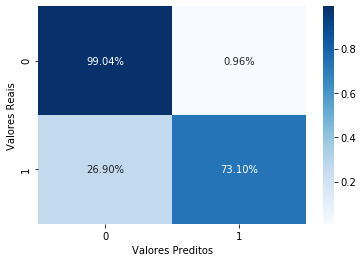

In [83]:
cria_matriz_de_confusao(y_test_atualizado, y_predict_atualizado_desbalanceado)

## Avaliando o __MLP__ com dados balanceados

E agora, iremos testar o modelo com dados balanceados! Para isso, usaremos novamente a função `RandomOverSampler` que acaba expandindo os valores menores até chegar ao mesmo tamanho do maior.

In [84]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

sampler = RandomOverSampler(random_state=0)
X_balanceado, y_balanceado = sampler.fit_resample(X, y)

print('Antes do Balanceamento:', Counter(y))
print('Depois do Balanceamento:', Counter(y_balanceado))

Antes do Balanceamento: Counter({0: 234282, 1: 20526})
Depois do Balanceamento: Counter({0: 234282, 1: 234282})


Com os dados balanceados, podemos treinar no mesmo modelo dos dados desbalanceados.

In [85]:
# Cria o classificador MLP com os mesmos hiper-parâmetros
# anteriores, tirando o early_stopping e aumentando para 1000 epocas (max_iter)
mlp_clr = MLPClassifier(
  random_state=0, shuffle=True, early_stopping=False,
  learning_rate_init=0.001, learning_rate='invscaling',
  hidden_layer_sizes=(100,), max_iter=1000,
)

# Treina nos dados balanceados
mlp_clr.fit(X_balanceado, y_balanceado)

MLPClassifier(learning_rate='invscaling', max_iter=1000, random_state=0)

Agora, faremos o mesmo processo novamente! Começando com a predição no conjunto de teste atualizado

In [86]:
y_predict_atualizado_balanceado = mlp_clr.predict(X_test_atualizado)

Com as predições, faremos o `classification_report`

In [87]:
print(classification_report(y_test_atualizado, y_predict_atualizado_balanceado))

              precision    recall  f1-score   support

           0       1.00      0.94      0.96     68151
           1       0.37      0.90      0.52      2840

    accuracy                           0.93     70991
   macro avg       0.68      0.92      0.74     70991
weighted avg       0.97      0.93      0.95     70991



e agora, será feito a matriz de confusão das predições.

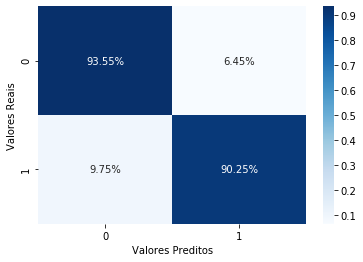

In [88]:
cria_matriz_de_confusao(y_test_atualizado, y_predict_atualizado_balanceado)

# Conclusões

Avaliando os resultados de ambos os modelos, é possível verificar que ambos possuem qualidades em diferentes pontos.

### Verificando o modelo com dados __desbalanceados__

Podemos notar que ele obteve uma acurácia maior que o modelo treinado com dados __balanceados__. Ele teve mais facilidade de verificar pessoas que não precisavam ser hospitalizadas, mandando apenas 0.96% das pessoas que __NÃO PRECISAVAM SER HOSPITALIZADAS__ para o hospital. Mas avaliando o outro lado, nota-se que 27% das pessoas que precisavam de hospitais não foram hospitalizadas.

### Verificando o modelo com dados __balanceados__

Neste caso, o modelo teve uma queda de acurácia, ficando com 93% (em comparação aos 98% dos dados __balanceados__). A precisão para pessoas que precisam ser hospitalizadas também ficou __MUITO__ abaixo do modelo anterior, mas com uma porcentagem alta de recall. Avaliando a matriz de confusão, pode notar que que o modelo acaba mandando 6.45% das pessoas que não precisam de hospitalização __MAS__ conseguindo 90.25% das que realmente necessitam.

### Visão Geral

Verificando o desempenho de ambos os modelos, eu escolheria o treinado com dados __balanceados__, pois acredito que um modelo que acerta mais as pessoas que __PRECISAM__ de hospitalização (que é um número bem menor das que não precisam) parece ser o melhor neste caso. Mesmo passando 6.45% das pessoas que não precisam das hospitalizações, acredito que o ganho de conseguir 90.25% dos hospitalizados me parece válido. (o melhor seria diminuir a quantidade de pessoas que precisam ser hospitalizadas que não foram)

## Referências

__[1]__ - http://carta.fee.tche.br/article/caracteristicas-da-populacao-indigena-no-rio-grande-do-sul/